In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics
from sklearn.utils import resample

import statsmodels.api as sm

pd.options.mode.chained_assignment = None 

warnings.filterwarnings('ignore')

# b)

In [3]:
bending1 = '../data/AReM/bending1/'
bending2 = '../data/AReM/bending2/'
cycling = '../data/AReM/cycling/'
lying = '../data/AReM/lying/'
sitting = '../data/AReM/sitting/'
standing = '../data/AReM/standing/'
walking = '../data/AReM/walking/'

test = {
    'bending1': [bending1+'dataset1.csv', bending1+'dataset2.csv'],
    'bending2': [bending2+'dataset1.csv', bending2+'dataset2.csv'],
    'lying': [lying+'dataset1.csv', lying+'dataset2.csv', lying+'dataset3.csv'],
    'sitting': [sitting+'dataset1.csv', sitting+'dataset2.csv', sitting+'dataset3.csv'],
    'standing': [standing+'dataset1.csv', standing+'dataset2.csv', standing+'dataset3.csv'],
    'walking': [walking+'dataset1.csv', walking+'dataset2.csv', walking+'dataset3.csv'],
    'cycling': [cycling+'dataset1.csv', cycling+'dataset2.csv', cycling+'dataset3.csv'],
}

train = {
    'bending1': [bending1+'dataset3.csv', bending1+'dataset4.csv', bending1+'dataset5.csv', bending1+'dataset6.csv', bending1+'dataset7.csv'],
    'bending2': [bending2+'dataset3.csv', bending2+'dataset4.csv', bending2+'dataset5.csv', bending2+'dataset6.csv'],
    'lying': [lying+'dataset4.csv', lying+'dataset5.csv', lying+'dataset6.csv', lying+'dataset7.csv', lying+'dataset8.csv', lying+'dataset9.csv', lying+'dataset10.csv', lying+'dataset11.csv', lying+'dataset12.csv', lying+'dataset13.csv', lying+'dataset14.csv', lying+'dataset15.csv'],
    'sitting': [sitting+'dataset4.csv', sitting+'dataset5.csv', sitting+'dataset6.csv', sitting+'dataset7.csv', sitting+'dataset8.csv', sitting+'dataset9.csv', sitting+'dataset10.csv', sitting+'dataset11.csv', sitting+'dataset12.csv', sitting+'dataset13.csv', sitting+'dataset14.csv', sitting+'dataset15.csv'],
    'standing': [standing+'dataset4.csv', standing+'dataset5.csv', standing+'dataset6.csv', standing+'dataset7.csv', standing+'dataset8.csv', standing+'dataset9.csv', standing+'dataset10.csv', standing+'dataset11.csv', standing+'dataset12.csv', standing+'dataset13.csv', standing+'dataset14.csv', standing+'dataset15.csv'],
    'walking': [walking+'dataset4.csv', walking+'dataset5.csv', walking+'dataset6.csv', walking+'dataset7.csv', walking+'dataset8.csv', walking+'dataset9.csv', walking+'dataset10.csv', walking+'dataset11.csv', walking+'dataset12.csv', walking+'dataset13.csv', walking+'dataset14.csv', walking+'dataset15.csv'],
    'cycling': [cycling+'dataset4.csv', cycling+'dataset5.csv', cycling+'dataset6.csv', cycling+'dataset7.csv', cycling+'dataset8.csv', cycling+'dataset9.csv', cycling+'dataset10.csv', cycling+'dataset11.csv', cycling+'dataset12.csv', cycling+'dataset13.csv', cycling+'dataset14.csv', cycling+'dataset15.csv'],
}

In [3]:
train

{'bending1': ['../data/AReM/bending1/dataset3.csv',
  '../data/AReM/bending1/dataset4.csv',
  '../data/AReM/bending1/dataset5.csv',
  '../data/AReM/bending1/dataset6.csv',
  '../data/AReM/bending1/dataset7.csv'],
 'bending2': ['../data/AReM/bending2/dataset3.csv',
  '../data/AReM/bending2/dataset4.csv',
  '../data/AReM/bending2/dataset5.csv',
  '../data/AReM/bending2/dataset6.csv'],
 'lying': ['../data/AReM/lying/dataset4.csv',
  '../data/AReM/lying/dataset5.csv',
  '../data/AReM/lying/dataset6.csv',
  '../data/AReM/lying/dataset7.csv',
  '../data/AReM/lying/dataset8.csv',
  '../data/AReM/lying/dataset9.csv',
  '../data/AReM/lying/dataset10.csv',
  '../data/AReM/lying/dataset11.csv',
  '../data/AReM/lying/dataset12.csv',
  '../data/AReM/lying/dataset13.csv',
  '../data/AReM/lying/dataset14.csv',
  '../data/AReM/lying/dataset15.csv'],
 'sitting': ['../data/AReM/sitting/dataset4.csv',
  '../data/AReM/sitting/dataset5.csv',
  '../data/AReM/sitting/dataset6.csv',
  '../data/AReM/sitting/da

In [4]:
test

{'bending1': ['../data/AReM/bending1/dataset1.csv',
  '../data/AReM/bending1/dataset2.csv'],
 'bending2': ['../data/AReM/bending2/dataset1.csv',
  '../data/AReM/bending2/dataset2.csv'],
 'lying': ['../data/AReM/lying/dataset1.csv',
  '../data/AReM/lying/dataset2.csv',
  '../data/AReM/lying/dataset3.csv'],
 'sitting': ['../data/AReM/sitting/dataset1.csv',
  '../data/AReM/sitting/dataset2.csv',
  '../data/AReM/sitting/dataset3.csv'],
 'standing': ['../data/AReM/standing/dataset1.csv',
  '../data/AReM/standing/dataset2.csv',
  '../data/AReM/standing/dataset3.csv'],
 'walking': ['../data/AReM/walking/dataset1.csv',
  '../data/AReM/walking/dataset2.csv',
  '../data/AReM/walking/dataset3.csv'],
 'cycling': ['../data/AReM/cycling/dataset1.csv',
  '../data/AReM/cycling/dataset2.csv',
  '../data/AReM/cycling/dataset3.csv']}

# c) i)

Time-domain features used:

1. Minimum
2. Maximum
3. Mean
4. Median
5. Standard Deviation
6. First Quartile
7. Third Quartile
8. Correlation structure
9. Distribution
10. Entropy
11. Stationarity
12. Scaling properties

In [4]:
columnNames = []
for i in range(6):
    columnNames.append('Min_' + str(i+1))
    columnNames.append('Max_' + str(i+1))
    columnNames.append('Mean_' + str(i+1))
    columnNames.append('Median_' + str(i+1))
    columnNames.append('Q1_' + str(i+1))
    columnNames.append('Q3_' + str(i+1))
    columnNames.append('Std_' + str(i+1))


def extractTimeFeatures(data):
    
    timeDomainFeatures = {}
    instance = 1

    for key, value in data.items():
    
        for path in value:
        
            df = pd.read_csv(path, skiprows=5, header=None)
        
            pd.read_csv(path, skiprows=5, header=None)
            df.columns = ['Time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
        
            row = []
            
            for i in range(1, len(df.columns)):
                arr = df[df.columns[i]].to_numpy()

                minimum = round(np.min(arr), 2)
                maximum = round(np.max(arr), 2)
                mean = round(np.mean(arr), 2)
                median = round(np.median(arr), 2)
                Q1 = round(np.quantile(arr, 0.25), 2)
                Q3 = round(np.quantile(arr, 0.75), 2)
                std = round(np.std(arr), 2)

                row.append(minimum)
                row.append(maximum)
                row.append(mean)
                row.append(median)
                row.append(Q1)
                row.append(Q3)
                row.append(std)
            
        
            timeInstance = path.split('/')
            timeDomainFeatures[timeInstance[3] + '/' + timeInstance[4]] = row
            instance += 1
        
    timeDomainFeatures
    feature_df = pd.DataFrame.from_dict(timeDomainFeatures, orient ='index')
    feature_df.columns = columnNames
    return feature_df


In [5]:
trainTimeFeatures_df = extractTimeFeatures(train)
trainTimeFeatures_df

Min_1  Max_1  Mean_1  Median_1   Q1_1   Q3_1  Std_1  \
bending1/dataset3.csv  35.00  47.40   43.95     44.33  43.00  45.00   1.56   
bending1/dataset4.csv  33.00  47.75   42.18     43.50  39.15  45.00   3.67   
bending1/dataset5.csv  33.00  45.75   41.68     41.75  41.33  42.75   2.24   
bending1/dataset6.csv  37.00  48.00   43.45     43.25  42.50  45.00   1.38   
bending1/dataset7.csv  36.25  48.00   43.97     44.50  43.31  44.67   1.62   
...                      ...    ...     ...       ...    ...    ...    ...   
cycling/dataset11.csv  27.00  44.33   36.54     36.00  33.25  39.81   4.01   
cycling/dataset12.csv  18.50  44.25   35.75     36.00  33.00  39.33   4.61   
cycling/dataset13.csv  19.00  43.75   35.88     36.00  33.00  39.50   4.61   
cycling/dataset14.csv  23.33  43.50   36.24     36.75  33.46  39.25   3.82   
cycling/dataset15.csv  24.25  45.00   37.18     36.25  34.50  40.25   3.58   

                       Min_2  Max_2  Mean_2  ...   Q1_5   Q3_5  Std_5  Min_6  \
bending1/dataset3.csv    0.0   1.70    0.43  ...  35.36  36.50   2.00    0.0   
bending1/dataset4.csv    0.0   3.00    0.70  ...  30.46  36.33   3.85    0.0   
bending1/dataset5.csv    0.0   2.83    0.54  ...  28.46  31.25   2.41    0.0   
bending1/dataset6.csv    0.0   1.58    0.38  ...  22.25  24.00   2.49    0.0   
bending1/dataset7.csv    0.0   1.50    0.41  ...  20.50  23.75   3.31    0.0   
...                      ...    ...     ...  ...    ...    ...    ...    ...   
cycling/dataset11.csv    0.0  10.43    2.85  ...  15.00  19.50   3.08    0.0   
cycling/dataset12.csv    0.0  12.60    3.33  ...  14.00  18.06   3.12    0.0   
cycling/dataset13.csv    0.0  11.20    3.41  ...  14.75  19.69   3.53    0.0   
cycling/dataset14.csv    0.0   9.71    2.74  ...  15.75  21.00   3.61    0.0   
cycling/dataset15.csv    0.0   8.58    2.37  ...  17.95  21.75   2.89    0.0   

                       Max_6  Mean_6  Median_6  Q1_6  Q3_6  Std_6  
bending1/dataset3.csv   1.79    0.49      0.43  0.00  0.94   0.51  
bending1/dataset4.csv   2.18    0.61      0.50  0.00  1.00   0.52  
bending1/dataset5.csv   1.79    0.38      0.43  0.00  0.50   0.39  
bending1/dataset6.csv   5.26    0.68      0.50  0.43  0.87   0.62  
bending1/dataset7.csv   2.96    0.56      0.49  0.00  0.83   0.49  
...                      ...     ...       ...   ...   ...    ...  
cycling/dataset11.csv   9.18    3.23      2.87  1.88  4.26   1.77  
cycling/dataset12.csv   9.39    3.07      2.77  1.80  4.06   1.75  
cycling/dataset13.csv   8.50    3.09      2.93  1.89  4.06   1.62  
cycling/dataset14.csv  11.15    3.53      3.11  2.17  4.62   1.96  
cycling/dataset15.csv   9.34    2.92      2.50  1.50  3.90   1.85  

[69 rows x 42 columns]

In [6]:
testTimeFeatures_df = extractTimeFeatures(test)
testTimeFeatures_df

Min_1  Max_1  Mean_1  Median_1   Q1_1   Q3_1  Std_1  \
bending1/dataset1.csv  37.25  45.00   40.62     40.50  39.25  42.00   1.48   
bending1/dataset2.csv  38.00  45.67   42.81     42.50  42.00  43.67   1.43   
bending2/dataset1.csv  12.75  51.00   24.56     24.25  23.19  26.50   3.73   
bending2/dataset2.csv   0.00  42.75   27.46     28.00  25.50  30.00   3.58   
lying/dataset1.csv     23.50  30.00   27.72     27.50  27.00  29.00   1.44   
lying/dataset2.csv     24.75  48.33   44.18     48.00  48.00  48.00   7.49   
lying/dataset3.csv     48.00  48.25   48.00     48.00  48.00  48.00   0.03   
sitting/dataset1.csv   33.25  48.00   42.36     43.00  42.00  43.50   2.07   
sitting/dataset2.csv   37.00  50.75   45.92     45.64  45.00  46.50   1.09   
sitting/dataset3.csv   44.50  46.75   45.24     45.00  45.00  45.33   0.43   
standing/dataset1.csv  33.33  48.00   44.33     45.00  42.25  46.50   2.47   
standing/dataset2.csv  35.50  46.25   43.17     43.67  42.50  44.50   1.99   
standing/dataset3.csv  32.75  47.00   42.76     44.50  41.33  45.37   3.40   
walking/dataset1.csv   19.33  43.50   34.23     35.50  30.50  37.75   4.88   
walking/dataset2.csv   12.50  45.00   33.51     34.12  30.50  36.75   4.85   
walking/dataset3.csv   15.00  46.75   34.66     35.00  31.00  38.25   5.31   
cycling/dataset1.csv   24.25  45.00   37.18     36.25  34.50  40.25   3.58   
cycling/dataset2.csv   28.75  44.75   37.56     36.88  35.25  40.25   3.22   
cycling/dataset3.csv   22.00  44.67   37.06     36.00  34.50  40.06   3.71   

                       Min_2  Max_2  Mean_2  ...   Q1_5   Q3_5  Std_5  Min_6  \
bending1/dataset1.csv    0.0   1.30    0.36  ...  33.00  36.00   2.19    0.0   
bending1/dataset2.csv    0.0   1.22    0.37  ...  32.00  34.50   1.99    0.0   
bending2/dataset1.csv    0.0   6.87    0.59  ...  20.50  27.00   3.69    0.0   
bending2/dataset2.csv    0.0   7.76    0.45  ...  15.00  20.75   5.05    0.0   
lying/dataset1.csv       0.0   1.79    0.36  ...   5.50  10.75   4.07    0.0   
lying/dataset2.csv       0.0   3.11    0.10  ...   2.00   5.54   3.27    0.0   
lying/dataset3.csv       0.0   0.43    0.01  ...   4.67  10.00   3.27    0.0   
sitting/dataset1.csv     0.0   4.44    0.49  ...  10.19  17.69   4.95    0.0   
sitting/dataset2.csv     0.0   4.87    0.32  ...  16.50  21.00   3.58    0.0   
sitting/dataset3.csv     0.0   1.00    0.17  ...  17.63  21.00   2.94    0.0   
standing/dataset1.csv    0.0   3.90    0.43  ...   9.33  17.75   5.40    0.0   
standing/dataset2.csv    0.0   2.12    0.51  ...  12.75  16.50   2.98    0.0   
standing/dataset3.csv    0.0   3.34    0.49  ...  13.00  18.57   4.29    0.0   
walking/dataset1.csv     0.0  14.50    4.00  ...  14.75  18.67   3.09    0.0   
walking/dataset2.csv     0.0  13.05    4.45  ...  14.63  18.75   3.13    0.0   
walking/dataset3.csv     0.0  13.44    4.20  ...  14.25  18.50   3.15    0.0   
cycling/dataset1.csv     0.0   8.58    2.37  ...  17.95  21.75   2.89    0.0   
cycling/dataset2.csv     0.0   9.91    2.08  ...  18.00  21.50   2.72    0.0   
cycling/dataset3.csv     0.0  14.17    2.44  ...  16.00  21.00   3.53    0.0   

                       Max_6  Mean_6  Median_6  Q1_6  Q3_6  Std_6  
bending1/dataset1.csv   1.92    0.57      0.43  0.00  1.30   0.58  
bending1/dataset2.csv   3.11    0.57      0.43  0.00  1.30   0.60  
bending2/dataset1.csv   4.97    0.70      0.50  0.43  0.87   0.69  
bending2/dataset2.csv   6.76    1.12      0.83  0.47  1.30   1.01  
lying/dataset1.csv      4.50    0.73      0.71  0.43  1.00   0.61  
lying/dataset2.csv      3.91    0.69      0.50  0.32  0.94   0.68  
lying/dataset3.csv      2.50    0.64      0.50  0.46  0.83   0.39  
sitting/dataset1.csv    6.02    1.03      0.83  0.47  1.25   0.98  
sitting/dataset2.csv    7.22    0.90      0.71  0.43  1.12   0.90  
sitting/dataset3.csv    8.20    0.84      0.71  0.43  1.12   0.83  
standing/dataset1.csv   5.02    0.93      0.83  0.47  1.25   0.67  
standing/dataset2.csv   5.72    0.91      0.8

# c) iii)

In [7]:
#np.std(trainTimeFeatures_df['Mean_1'].to_numpy())
pd.DataFrame(trainTimeFeatures_df.describe().loc['std'])

std
Min_1     8.794295
Max_1     4.429182
Mean_1    4.917175
Median_1  4.956166
Q1_1      5.731247
Q3_1      4.783823
Std_1     1.757394
Min_2     0.000000
Max_2     5.147841
Mean_2    1.600702
Median_2  1.436874
Q1_2      0.952286
Q3_2      2.157770
Std_2     0.901930
Min_3     3.053869
Max_3     4.759853
Mean_3    3.863430
Median_3  3.845621
Q1_3      4.145274
Q3_3      3.945855
Std_3     0.994997
Min_4     0.000000
Max_4     2.302408
Mean_4    1.180253
Median_4  1.149306
Q1_4      0.843043
Q3_4      1.566658
Std_4     0.472742
Min_5     5.368786
Max_5     5.449726
Mean_5    5.120486
Median_5  5.267422
Q1_5      5.543734
Q3_5      4.957256
Std_5     1.057013
Min_6     0.051766
Max_6     2.540166
Mean_6    1.170864
Median_6  1.104060
Q1_6      0.774049
Q3_6      1.550412
Std_6     0.519445

In [8]:
pd.DataFrame(testTimeFeatures_df.describe().loc['std'])

std
Min_1     12.136206
Max_1      4.379342
Mean_1     6.789401
Median_1   7.088457
Q1_1       7.672798
Q3_1       6.385630
Std_1      1.867628
Min_2      0.000000
Max_2      4.870395
Mean_2     1.501018
Median_2   1.345296
Q1_2       0.941570
Q3_2       2.027958
Std_2      0.831555
Min_3      2.644618
Max_3      5.393220
Mean_3     4.588052
Median_3   4.753555
Q1_3       4.554150
Q3_3       5.014339
Std_3      0.760175
Min_4      0.000000
Max_4      1.733937
Mean_4     1.145197
Median_4   1.161897
Q1_4       0.867330
Q3_4       1.542332
Std_4      0.408467
Min_5      8.252947
Max_5      6.782153
Mean_5     7.365909
Median_5   7.439009
Q1_5       7.823817
Q3_5       7.259657
Std_5      0.918816
Min_6      0.000000
Max_6      2.505306
Mean_6     1.119510
Median_6   1.037341
Q1_6       0.711550
Q3_6       1.461025
Std_6      0.525028

In [9]:
data = resample(trainTimeFeatures_df)
data.describe().loc['std']

Min_1       7.893878
Max_1       4.687794
Mean_1      4.546697
Median_1    4.563957
Q1_1        5.419565
Q3_1        4.321105
Std_1       1.805259
Min_2       0.000000
Max_2       5.750492
Mean_2      1.736350
Median_2    1.548119
Q1_2        1.025605
Q3_2        2.325742
Std_2       0.981975
Min_3       3.068378
Max_3       5.133894
Mean_3      3.991128
Median_3    3.945639
Q1_3        4.118980
Q3_3        4.145715
Std_3       0.891449
Min_4       0.000000
Max_4       2.387707
Mean_4      1.233933
Median_4    1.200455
Q1_4        0.876951
Q3_4        1.637609
Std_4       0.490529
Min_5       3.891408
Max_5       4.146405
Mean_5      3.793742
Median_5    3.757046
Q1_5        4.204878
Q3_5        3.724355
Std_5       0.809490
Min_6       0.000000
Max_6       2.628750
Mean_6      1.231624
Median_6    1.151970
Q1_6        0.803615
Q3_6        1.631525
Std_6       0.550626
Name: std, dtype: float64

In [10]:
samples_std = []

for i in range(1000):
    data = resample(trainTimeFeatures_df)
    std_bootstrapped_sample = data.describe().loc['std']
    samples_std.append(std_bootstrapped_sample)

In [11]:
bootstrapped_data = pd.DataFrame(samples_std)
bootstrapped_data.columns = trainTimeFeatures_df.columns
answer = {}

for col in bootstrapped_data.columns:
    np_arr = bootstrapped_data[col].to_numpy()
    
    LB = round(np.quantile(np_arr, 0.05), 2)
    UB = round(np.quantile(np_arr, 0.95), 2)
    
    answer[col] = [LB, UB]
    
answer = pd.DataFrame.from_dict(answer, orient='index')
answer.columns = ['Lower Bound', 'Upper Bound']
answer

Lower Bound  Upper Bound
Min_1            7.61        10.01
Max_1            3.30         5.41
Mean_1           4.31         5.42
Median_1         4.31         5.46
Q1_1             5.12         6.19
Q3_1             3.89         5.60
Std_1            1.54         1.96
Min_2            0.00         0.00
Max_2            4.67         5.50
Mean_2           1.42         1.73
Median_2         1.25         1.58
Q1_2             0.83         1.04
Q3_2             1.92         2.33
Std_2            0.82         0.96
Min_3            2.84         3.22
Max_3            4.01         5.40
Mean_3           3.23         4.39
Median_3         3.22         4.39
Q1_3             3.53         4.65
Q3_3             3.30         4.51
Std_3            0.77         1.20
Min_4            0.00         0.00
Max_4            2.08         2.51
Mean_4           1.09         1.24
Median_4         1.06         1.20
Q1_4             0.77         0.89
Q3_4             1.45         1.64
Std_4            0.43         0.50
Min_5            3.59         6.80
Max_5            4.37         6.37
Mean_5           3.67         6.27
Median_5         3.72         6.48
Q1_5             4.08         6.77
Q3_5             3.59         6.03
Std_5            0.79         1.28
Min_6            0.00         0.09
Max_6            2.24         2.83
Mean_6           1.08         1.23
Median_6         1.01         1.17
Q1_6             0.70         0.83
Q3_6             1.43         1.63
Std_6            0.48         0.55

# c) iv)

In [12]:
#for col in trainTimeFeatures_df.columns:
#    seaborn.displot(col)
    
trainTimeFeatures_df

Min_1  Max_1  Mean_1  Median_1   Q1_1   Q3_1  Std_1  \
bending1/dataset3.csv  35.00  47.40   43.95     44.33  43.00  45.00   1.56   
bending1/dataset4.csv  33.00  47.75   42.18     43.50  39.15  45.00   3.67   
bending1/dataset5.csv  33.00  45.75   41.68     41.75  41.33  42.75   2.24   
bending1/dataset6.csv  37.00  48.00   43.45     43.25  42.50  45.00   1.38   
bending1/dataset7.csv  36.25  48.00   43.97     44.50  43.31  44.67   1.62   
...                      ...    ...     ...       ...    ...    ...    ...   
cycling/dataset11.csv  27.00  44.33   36.54     36.00  33.25  39.81   4.01   
cycling/dataset12.csv  18.50  44.25   35.75     36.00  33.00  39.33   4.61   
cycling/dataset13.csv  19.00  43.75   35.88     36.00  33.00  39.50   4.61   
cycling/dataset14.csv  23.33  43.50   36.24     36.75  33.46  39.25   3.82   
cycling/dataset15.csv  24.25  45.00   37.18     36.25  34.50  40.25   3.58   

                       Min_2  Max_2  Mean_2  ...   Q1_5   Q3_5  Std_5  Min_6  \
bending1/dataset3.csv    0.0   1.70    0.43  ...  35.36  36.50   2.00    0.0   
bending1/dataset4.csv    0.0   3.00    0.70  ...  30.46  36.33   3.85    0.0   
bending1/dataset5.csv    0.0   2.83    0.54  ...  28.46  31.25   2.41    0.0   
bending1/dataset6.csv    0.0   1.58    0.38  ...  22.25  24.00   2.49    0.0   
bending1/dataset7.csv    0.0   1.50    0.41  ...  20.50  23.75   3.31    0.0   
...                      ...    ...     ...  ...    ...    ...    ...    ...   
cycling/dataset11.csv    0.0  10.43    2.85  ...  15.00  19.50   3.08    0.0   
cycling/dataset12.csv    0.0  12.60    3.33  ...  14.00  18.06   3.12    0.0   
cycling/dataset13.csv    0.0  11.20    3.41  ...  14.75  19.69   3.53    0.0   
cycling/dataset14.csv    0.0   9.71    2.74  ...  15.75  21.00   3.61    0.0   
cycling/dataset15.csv    0.0   8.58    2.37  ...  17.95  21.75   2.89    0.0   

                       Max_6  Mean_6  Median_6  Q1_6  Q3_6  Std_6  
bending1/dataset3.csv   1.79    0.49      0.43  0.00  0.94   0.51  
bending1/dataset4.csv   2.18    0.61      0.50  0.00  1.00   0.52  
bending1/dataset5.csv   1.79    0.38      0.43  0.00  0.50   0.39  
bending1/dataset6.csv   5.26    0.68      0.50  0.43  0.87   0.62  
bending1/dataset7.csv   2.96    0.56      0.49  0.00  0.83   0.49  
...                      ...     ...       ...   ...   ...    ...  
cycling/dataset11.csv   9.18    3.23      2.87  1.88  4.26   1.77  
cycling/dataset12.csv   9.39    3.07      2.77  1.80  4.06   1.75  
cycling/dataset13.csv   8.50    3.09      2.93  1.89  4.06   1.62  
cycling/dataset14.csv  11.15    3.53      3.11  2.17  4.62   1.96  
cycling/dataset15.csv   9.34    2.92      2.50  1.50  3.90   1.85  

[69 rows x 42 columns]

# 2a)

# i)

Min_1  Max_1   Q3_1  Min_2  Max_2  Q3_2  Min_6  Max_6  \
bending1/dataset3.csv  35.00  47.40  45.00    0.0   1.70  0.50    0.0   1.79   
bending1/dataset4.csv  33.00  47.75  45.00    0.0   3.00  1.12    0.0   2.18   
bending1/dataset5.csv  33.00  45.75  42.75    0.0   2.83  0.71    0.0   1.79   
bending1/dataset6.csv  37.00  48.00  45.00    0.0   1.58  0.50    0.0   5.26   
bending1/dataset7.csv  36.25  48.00  44.67    0.0   1.50  0.50    0.0   2.96   
...                      ...    ...    ...    ...    ...   ...    ...    ...   
cycling/dataset11.csv  27.00  44.33  39.81    0.0  10.43  4.15    0.0   9.18   
cycling/dataset12.csv  18.50  44.25  39.33    0.0  12.60  4.33    0.0   9.39   
cycling/dataset13.csv  19.00  43.75  39.50    0.0  11.20  4.85    0.0   8.50   
cycling/dataset14.csv  23.33  43.50  39.25    0.0   9.71  3.74    0.0  11.15   
cycling/dataset15.csv  24.25  45.00  40.25    0.0   8.58  3.13    0.0   9.34   

                       Q3_6  label  
bending1/dataset3.csv  0.94    1.0  
bending1/dataset4.csv  1.00    1.0  
bending1/dataset5.csv  0.50    1.0  
bending1/dataset6.csv  0.87    1.0  
bending1/dataset7.csv  0.83    1.0  
...                     ...    ...  
cycling/dataset11.csv  4.26    0.0  
cycling/dataset12.csv  4.06    0.0  
cycling/dataset13.csv  4.06    0.0  
cycling/dataset14.csv  4.62    0.0  
cycling/dataset15.csv  3.90    0.0  

[69 rows x 10 columns]

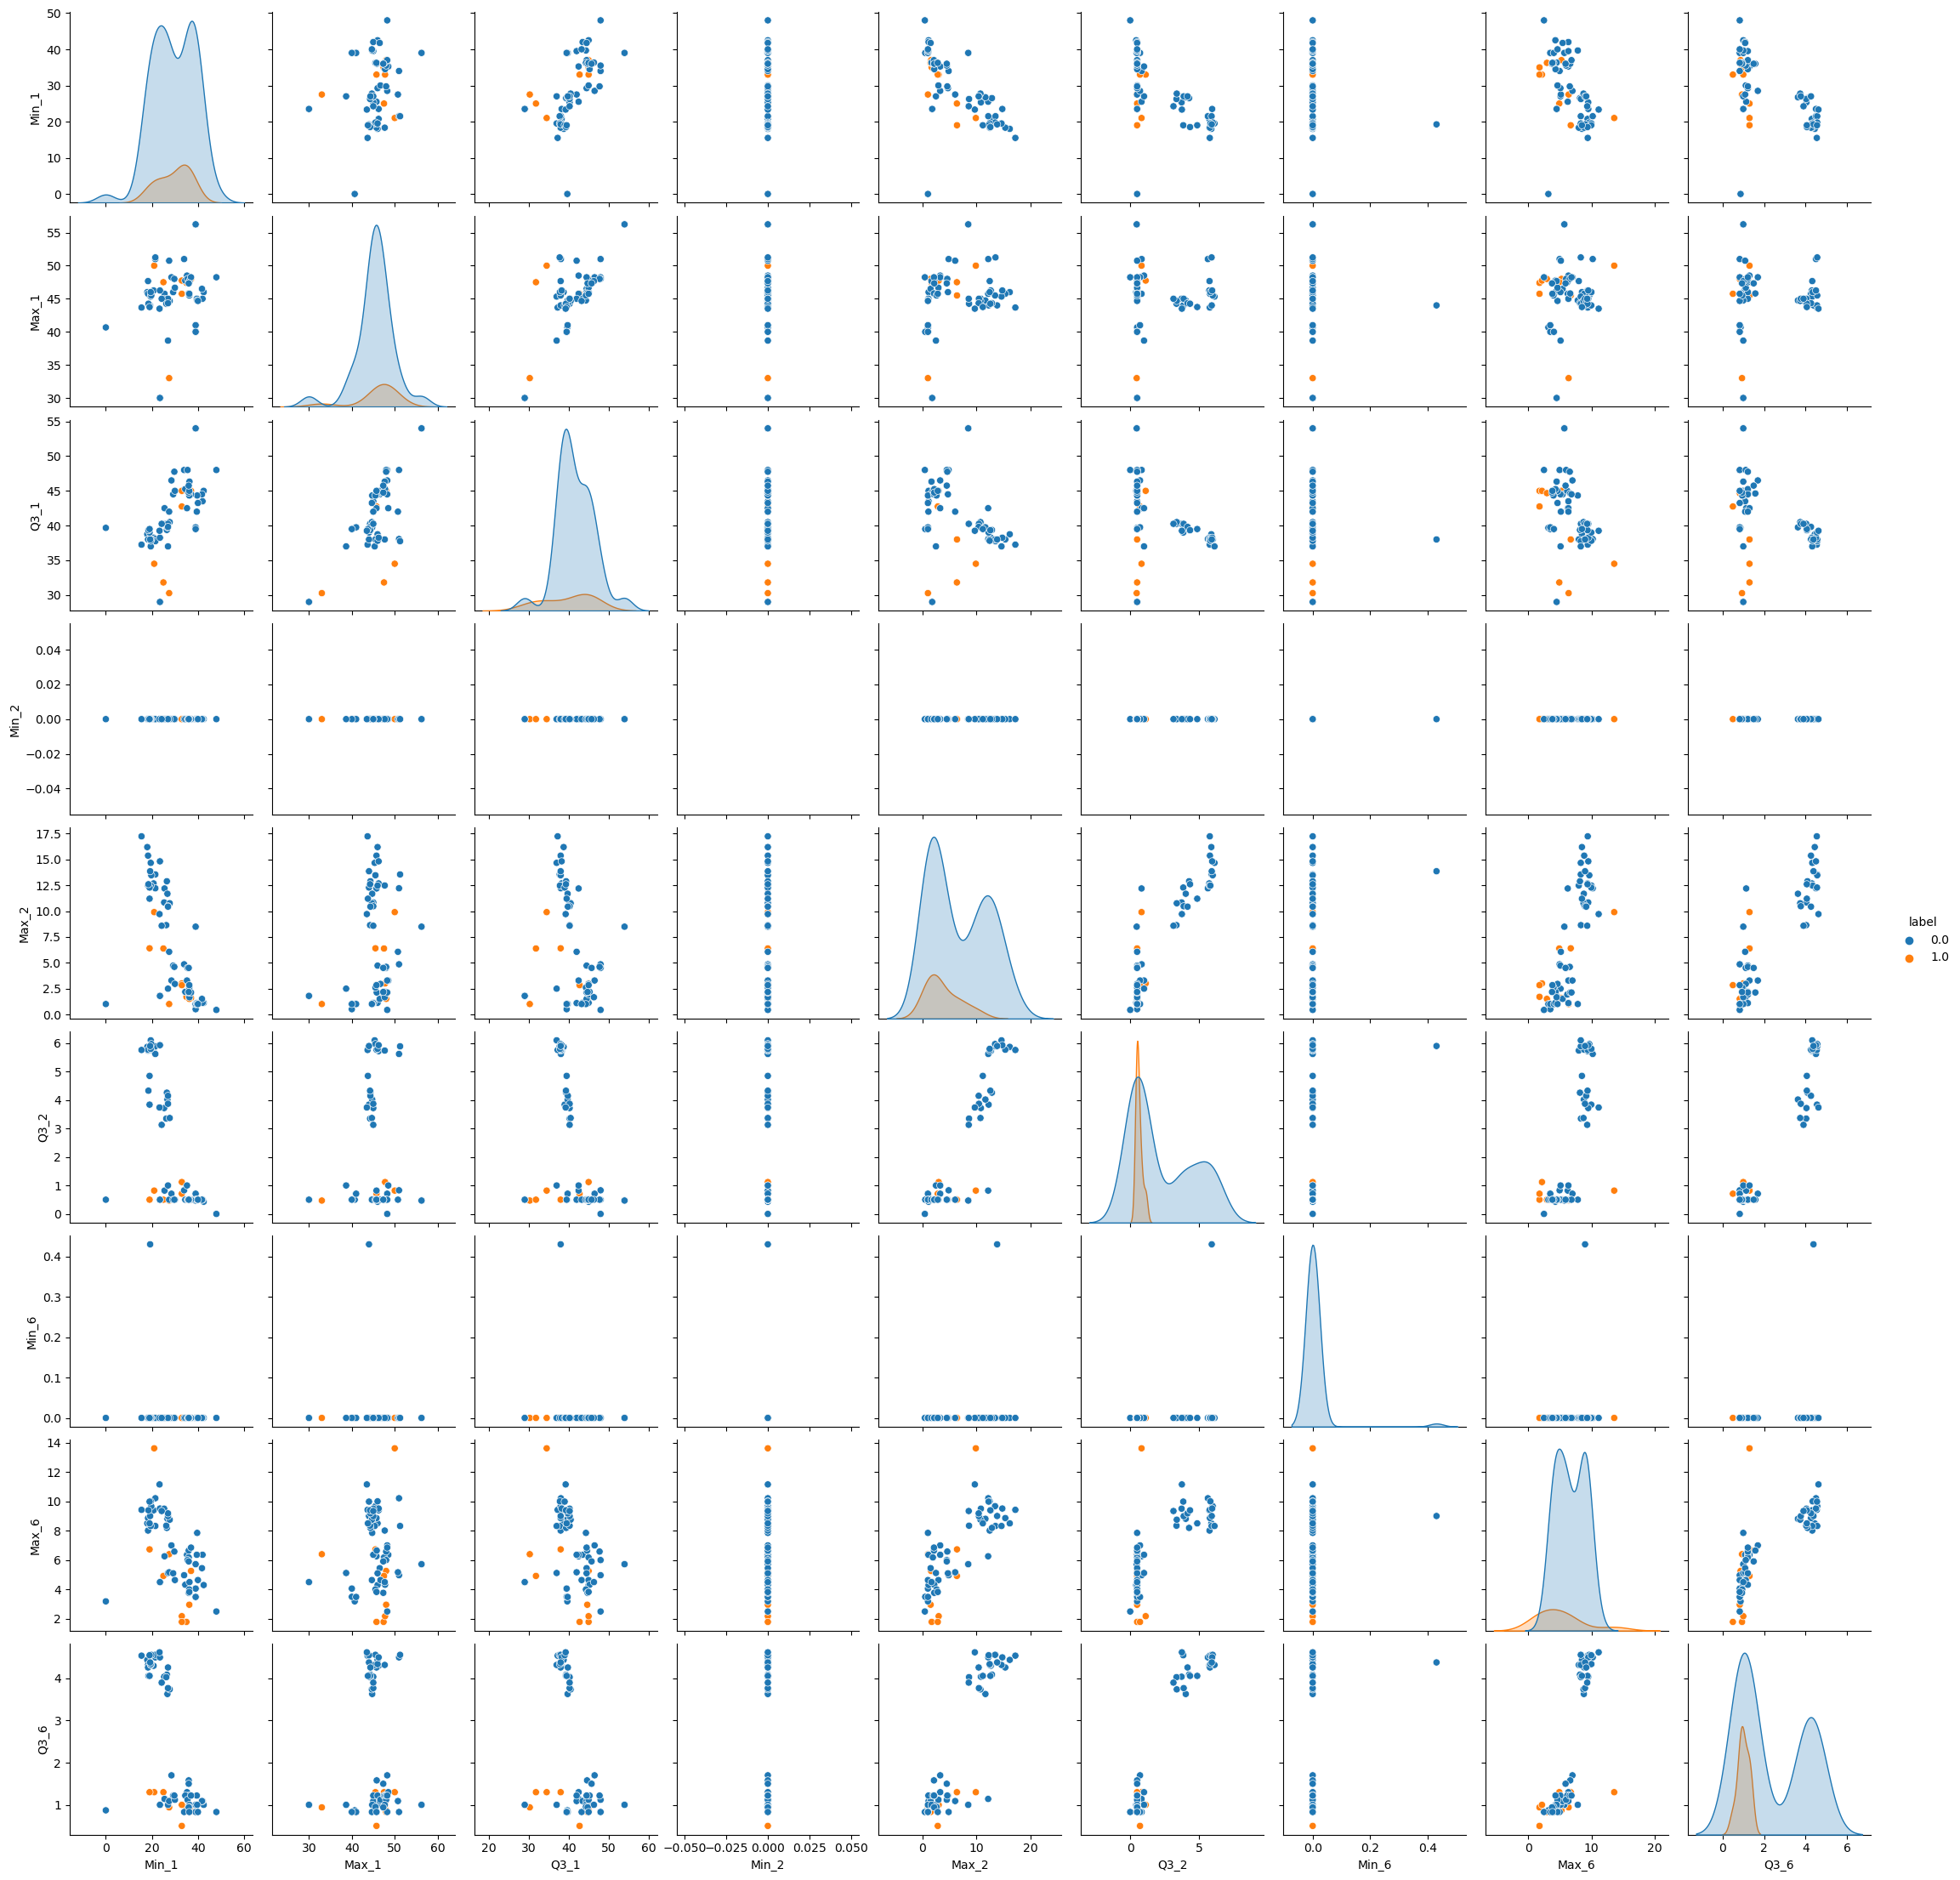

In [13]:
cols = ['Min_1', 'Max_1', 'Q3_1', 'Min_2', 'Max_2', 'Q3_2', 'Min_6', 'Max_6', 'Q3_6']
bending_train_data_df = trainTimeFeatures_df[cols]

for indx, row in bending_train_data_df.iterrows():
    
    if 'bending1' in indx or 'bending2' in indx:
        bending_train_data_df.at[indx, 'label'] = 1
    else:
        bending_train_data_df.at[indx, 'label'] = 0



seaborn.pairplot(bending_train_data_df, hue='label')
bending_train_data_df

# ii)

In [14]:
def createTimeSeriesRow(segment1_df, segment2_df):
    row = []
    
    for i in range(1, 7):
        minimum = segment1_df.loc['min'][i]
        maximum = segment1_df.loc['max'][i]
        mean = segment1_df.loc['mean'][i]
        median = segment1_df.loc['50%'][i]
        std = segment1_df.loc['std'][i]
        Q1 = segment1_df.loc['25%'][i]
        Q3 = segment1_df.loc['75%'][i]
        
        row.append(round(minimum,2))
        row.append(round(maximum,2))
        row.append(round(mean,2))
        row.append(round(median,2))
        row.append(round(std,2))
        row.append(round(Q1,2))
        row.append(round(Q3,2))
        
    
    for i in range(1, 7):
        minimum = segment2_df.loc['min'][i]
        maximum = segment2_df.loc['max'][i]
        mean = segment2_df.loc['mean'][i]
        median = segment2_df.loc['50%'][i]
        std = segment2_df.loc['std'][i]
        Q1 = segment2_df.loc['25%'][i]
        Q3 = segment2_df.loc['75%'][i]
        
        row.append(round(minimum,2))
        row.append(round(maximum,2))
        row.append(round(mean,2))
        row.append(round(median,2))
        row.append(round(std,2))
        row.append(round(Q1,2))
        row.append(round(Q3,2))
    
    return row
        
        
def extract2xTimeFeatures(data):
    
    timeDomainFeatures = {}
    instance = 1

    for key, value in data.items():
    
        for path in value:
        
            df_2x = pd.read_csv(path, skiprows=5, header=None)
        
            length = df_2x.shape[0]
            start1 = 0
            end1 = length//2

            segment1_df = df_2x[0: end1].describe()
            segment2_df = df_2x[end1:length].describe()
            
            row = createTimeSeriesRow(segment1_df, segment2_df)
            
        
            timeInstance = path.split('/')
            timeDomainFeatures[timeInstance[3] + '/' + timeInstance[4]] = row
            instance += 1
        
    feature_df = pd.DataFrame.from_dict(timeDomainFeatures, orient ='index')
    
    cols = []
    for i in range(1, 13):
        cols.append('Min_' + str(i))
        cols.append('Max_' + str(i))
        cols.append('Mean_' + str(i))
        cols.append('Median_' + str(i))
        cols.append('Std_' + str(i))
        cols.append('Q1_' + str(i))
        cols.append('Q3_' + str(i))
        
    feature_df.columns = cols
    return feature_df

Min_1  Max_1   Q3_1  Min_2  Max_2  Q3_2  Min_3  Max_3  \
bending1/dataset3.csv  36.50  46.50  45.00    0.0   1.50  0.50  14.25  29.25   
bending1/dataset4.csv  33.75  47.75  45.25    0.0   3.00  1.00  11.00  30.00   
bending1/dataset5.csv  33.00  45.75  44.25    0.0   2.83  0.83   3.00  28.25   
bending1/dataset6.csv  39.00  48.00  45.00    0.0   1.30  0.50   6.25  27.00   
bending1/dataset7.csv  36.67  45.00  44.50    0.0   1.30  0.50   4.00  26.33   
...                      ...    ...    ...    ...    ...   ...    ...    ...   
cycling/dataset11.csv  27.67  44.33  40.27    0.0   9.12  4.45   7.00  25.25   
cycling/dataset12.csv  20.00  44.25  39.25    0.0  11.39  4.44   5.00  27.00   
cycling/dataset13.csv  19.00  43.75  39.56    0.0  11.20  5.10   7.67  22.75   
cycling/dataset14.csv  27.00  42.67  39.00    0.0   9.71  3.77   9.50  28.00   
cycling/dataset15.csv  24.25  45.00  40.25    0.0   8.18  3.27   5.50  26.75   

                        Q3_3  Min_4  Max_4  Q3_4  Min_11  Max_11  Q3_11  \
bending1/dataset3.csv  24.00    0.0   2.74  0.83   29.00   38.25  36.25   
bending1/dataset4.csv  24.81    0.0   4.77  1.25   20.00   38.50  33.75   
bending1/dataset5.csv  24.00    0.0   6.42  1.63   26.00   36.00  30.56   
bending1/dataset6.csv  20.00    0.0  10.03  1.41    8.00   26.00  23.75   
bending1/dataset7.csv  18.00    0.0   5.17  0.96   13.75   26.00  23.50   
...                      ...    ...    ...   ...     ...     ...    ...   
cycling/dataset11.csv  19.50    0.0   9.63  4.38    9.67   23.33  19.06   
cycling/dataset12.csv  18.06    0.0   9.46  3.90    7.00   24.33  18.25   
cycling/dataset13.csv  18.50    0.0   8.73  4.20   10.67   26.50  20.50   
cycling/dataset14.csv  21.00    0.0   9.78  4.09    8.00   26.67  21.06   
cycling/dataset15.csv  19.25    0.0   8.05  4.06   11.75   24.50  21.67   

                       Min_12  Max_12  Q3_12  label  
bending1/dataset3.csv     0.0    1.50   0.71    1.0  
bending1/dataset4.csv     0.0    2.18   0.87    1.0  
bending1/dataset5.csv     0.0    1.50   0.50    1.0  
bending1/dataset6.csv     0.0    4.06   0.71    1.0  
bending1/dataset7.csv     0.0    2.96   0.83    1.0  
...                       ...     ...    ...    ...  
cycling/dataset11.csv     0.0    9.18   4.22    0.0  
cycling/dataset12.csv     0.0    8.81   3.74    0.0  
cycling/dataset13.csv     0.0    7.89   3.70    0.0  
cycling/dataset14.csv     0.0   11.15   4.50    0.0  
cycling/dataset15.csv     0.0    9.34   3.83    0.0  

[69 rows x 19 columns]

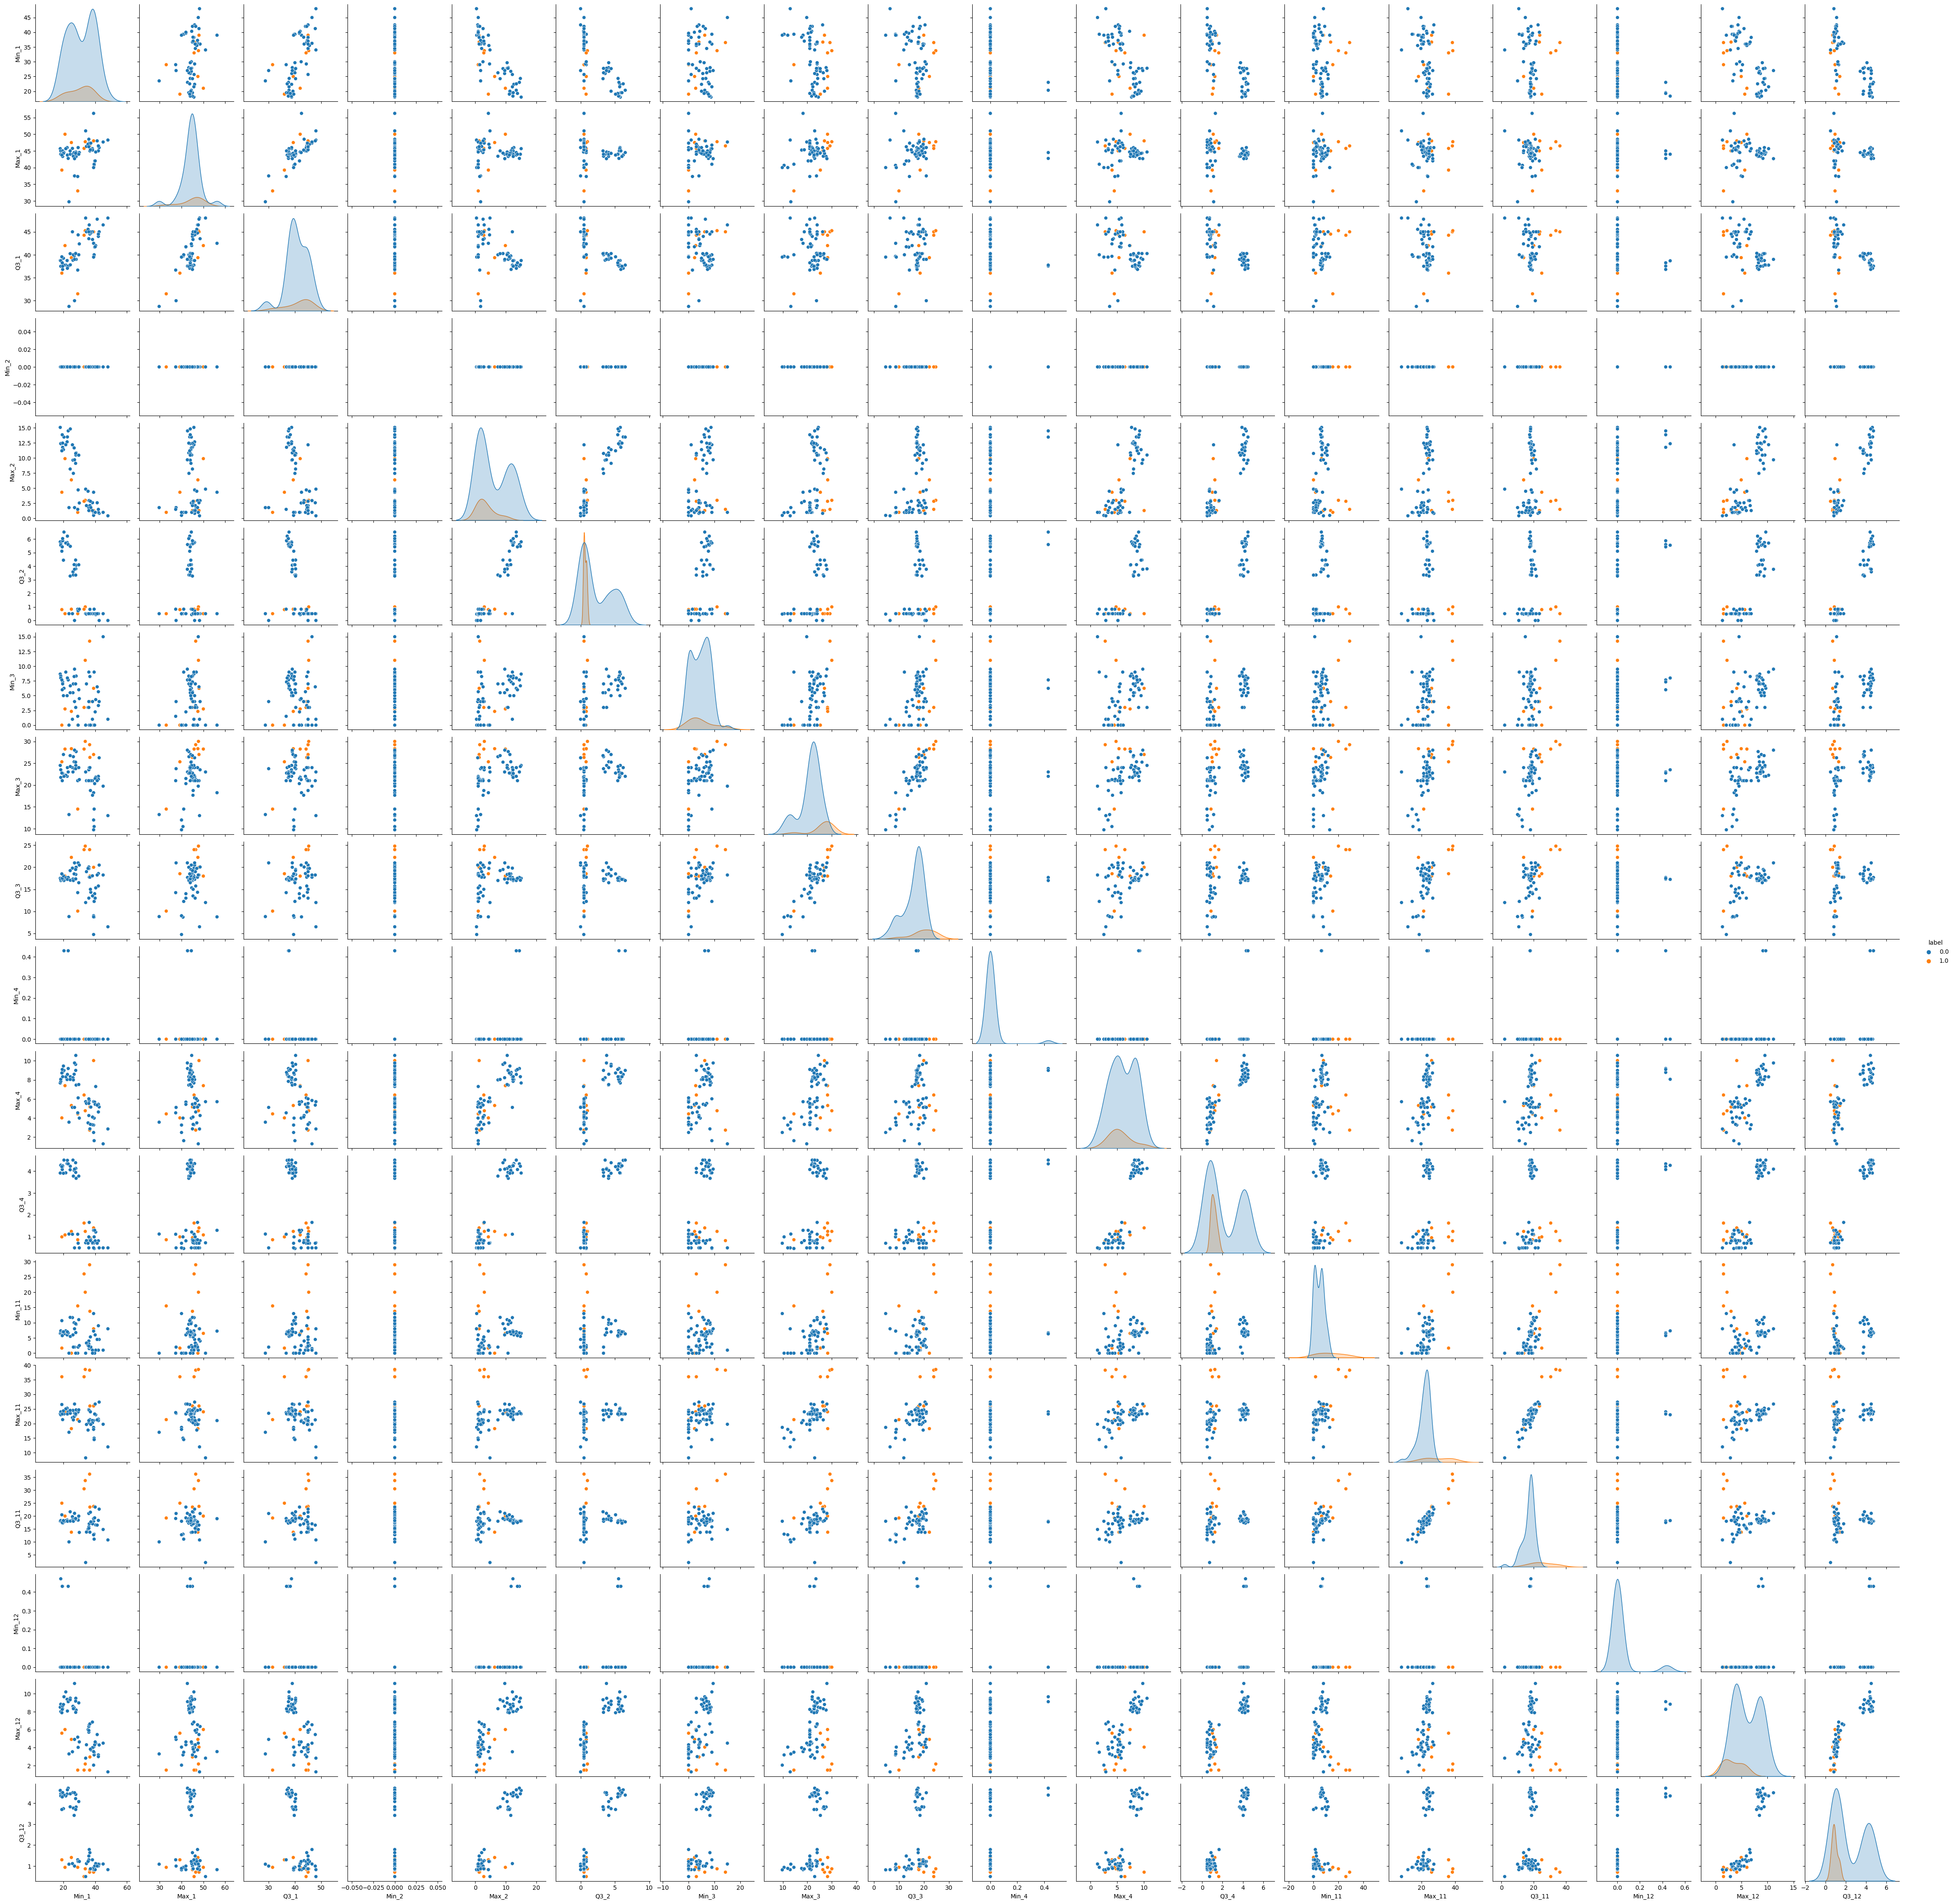

In [15]:
#Write observations
train_data_df_2x = extract2xTimeFeatures(train)

cols = ['Min_1', 'Max_1', 'Q3_1', 'Min_2', 'Max_2', 'Q3_2', 'Min_3', 'Max_3', 'Q3_3', 'Min_4', 'Max_4', 'Q3_4', 'Min_11', 'Max_11', 'Q3_11', 'Min_12', 'Max_12', 'Q3_12']

bending_train_data_df = train_data_df_2x[cols]

for indx, row in bending_train_data_df.iterrows():
    
    if 'bending1' in indx or 'bending2' in indx:
        bending_train_data_df.at[indx, 'label'] = 1
    else:
        bending_train_data_df.at[indx, 'label'] = 0


seaborn.pairplot(bending_train_data_df, hue='label')
bending_train_data_df

Results from 2a) i) and 2b) i) look similar without much difference

# iii)

In [17]:
def get_df_row(df_2x, l_value):
    row = []
    length = df_2x.shape[0] // l_value
    remainder = df_2x.shape[0] % l_value
    i, seg_indx = 1, 0
    
    while i <= remainder:
        #print("Start - " + str(seg_indx) + ", End - " + str(seg_indx + length + 1))
        segment_df = df_2x[seg_indx: seg_indx+length+1].describe()
        
        for j in range(1, 7):
            minimum = segment_df.loc['min'][j]
            maximum = segment_df.loc['max'][j]
            mean = segment_df.loc['mean'][j]
            median = segment_df.loc['50%'][j]
            std = segment_df.loc['std'][j]
            Q1 = segment_df.loc['25%'][j]
            Q3 = segment_df.loc['75%'][j]
        
            row.append(round(minimum,2))
            row.append(round(maximum,2))
            row.append(round(mean,2))
            row.append(round(median,2))
            row.append(round(std,2))
            row.append(round(Q1,2))
            row.append(round(Q3,2))
        
        seg_indx += length + 1
        i += 1
        
    while i <= l_value:
        #print("Start - " + str(seg_indx) + ", End - " + str(seg_indx + length))
        segment_df = df_2x[seg_indx: seg_indx+length].describe()
        
        for j in range(1, 7):
            minimum = segment_df.loc['min'][j]
            maximum = segment_df.loc['max'][j]
            mean = segment_df.loc['mean'][j]
            median = segment_df.loc['50%'][j]
            std = segment_df.loc['std'][j]
            Q1 = segment_df.loc['25%'][j]
            Q3 = segment_df.loc['75%'][j]
        
            row.append(round(minimum,2))
            row.append(round(maximum,2))
            row.append(round(mean,2))
            row.append(round(median,2))
            row.append(round(std,2))
            row.append(round(Q1,2))
            row.append(round(Q3,2))
        
        seg_indx += length + 1
        i += 1
        
    return row
    

In [18]:
def get_lx_df(training_files, l_val):
    
    timeDomainFeatures = {}
    
    for activity, files in training_files.items():
    
        for filePath in files:
        
            df_lx = pd.read_csv(filePath, skiprows=5, header=None)
            
            row = get_df_row(df_lx, l_val)
        
            timeInstance = filePath.split('/')
            timeDomainFeatures[timeInstance[3] + '/' + timeInstance[4]] = row
        
    
    feature_df = pd.DataFrame.from_dict(timeDomainFeatures, orient ='index')
    cols = []
    for i in range(1, 6*l_val + 1):
        cols.append('Min_' + str(i))
        cols.append('Max_' + str(i))
        cols.append('Mean_' + str(i))
        cols.append('Median_' + str(i))
        cols.append('Std_' + str(i))
        cols.append('Q1_' + str(i))
        cols.append('Q3_' + str(i))

    feature_df.columns = cols
    
    return feature_df

In [19]:
for l_val in range(1, 21):

    df_lx = get_lx_df(train, l_val)
    
    for indx, row in df_lx.iterrows():
        if 'bending1' in indx or 'bending2' in indx:
            df_lx.at[indx, 'label'] = 1
        else:
            df_lx.at[indx, 'label'] = 0
            
    X_train = df_lx.iloc[:, :-1]
    Y_train = df_lx.iloc[:, -1]
            
    validator = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_model = LogisticRegression(max_iter=500)
    
    sel = RFECV(estimator=lr_model, scoring='accuracy', cv=validator)
    sel.fit(X_train, Y_train)
    
    p = sel.n_features_
    acc = round(sel.cv_results_['mean_test_score'].max(), 4)
    
    print( "(l,p): (" +  str(l_val) + ", " + str(p) + "). Accuracy = " + str(acc))
       

(l,p): (1, 6). Accuracy = 0.9714
(l,p): (2, 4). Accuracy = 0.9571
(l,p): (3, 7). Accuracy = 0.9714
(l,p): (4, 16). Accuracy = 0.9857
(l,p): (5, 6). Accuracy = 0.9857
(l,p): (6, 10). Accuracy = 0.9714
(l,p): (7, 27). Accuracy = 0.9714
(l,p): (8, 27). Accuracy = 0.9714
(l,p): (9, 3). Accuracy = 0.9714
(l,p): (10, 30). Accuracy = 0.9714
(l,p): (11, 2). Accuracy = 0.9714
(l,p): (12, 6). Accuracy = 0.9857
(l,p): (13, 6). Accuracy = 1.0
(l,p): (14, 1). Accuracy = 0.9714
(l,p): (15, 7). Accuracy = 0.9571
(l,p): (16, 33). Accuracy = 0.9714
(l,p): (17, 5). Accuracy = 0.9714
(l,p): (18, 1). Accuracy = 0.9857
(l,p): (19, 1). Accuracy = 1.0
(l,p): (20, 6). Accuracy = 0.9857


The correct way to perform cross-validation is along with recursive feature elimination.
The wrong way to perform cross-validation is after recursive feature elimination.


# 2a) iv)

In [20]:
def train_model(df_lx):
    for indx, row in df_lx.iterrows():
        if 'bending1' in indx or 'bending2' in indx:
            df_lx.at[indx, 'label'] = 1
        else:
            df_lx.at[indx, 'label'] = 0

    X_train = df_lx.iloc[:, :-1]
    Y_train = df_lx.iloc[:, -1]

    validator = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_model = LogisticRegression(max_iter=400)
    sel = RFECV(estimator=lr_model, scoring='accuracy', cv=validator)
    sel.fit(X_train, Y_train)
    
    return lr_model, sel

In [46]:
l_val = 1
selected_features = []

df_lx = get_lx_df(train, l_val)

lr_model, selector = train_model(df_lx)

for i in range(len(df_lx.columns)-1):
    if selector.support_[i]:
        selected_features.append(df_lx.columns[i])
        
selected_features

['Q3_1', 'Min_3', 'Min_5', 'Max_5', 'Mean_5', 'Q1_5']

In [47]:
X_train = df_lx[selected_features].to_numpy()
Y_train = df_lx['label'].to_numpy()

intercept = sm.add_constant(X_train)
sm_lr_model = sm.Logit(Y_train, intercept).fit(method='bfgs')
sm_lr_model.summary()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                   1.000
Time:                        17:27:26   Log-Likelihood:            -1.5460e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.588e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2817   1.26e+06  -1.01e-06      1.000   -2.48e+06    2.48e+06
x1            -5.6227   2.05e+04     -0.000      1.000   -4.02e+04    4.02e+04
x2            -6.8620   3.91e+04     -0.000      1.000   -7.66e+04    7.66e+04
x3             4.4953   1.02e+04      0.000      1.000      -2e+04       2e+04
x4             3.9776   2.79e+04      0.000      1.000   -5.46e+04    5.46e+04
x5             0.9239   1.94e+05   4.77e-06      1.000    -3.8e+05     3.8e+05
x6             5.6569    1.3e+05   4.35e-05      1.000   -2.55e+05    2.55e+05
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [48]:
lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_train)
Y_pred_probability = lr_model.predict_proba(X_train)

print("CONFUSION MATRIX")
confusion_matrix(Y_train, Y_pred)

CONFUSION MATRIX


array([[60,  0],
       [ 0,  9]])

In [49]:
#CV Accuracy
count = 0
for i in range(len(Y_train)):
    if Y_train[i] == Y_pred[i]:
        count += 1
        
cv_acc = round(count/len(Y_train), 4)
print("Cross Validation accuracy = " + str(cv_acc))

Cross Validation accuracy = 1.0


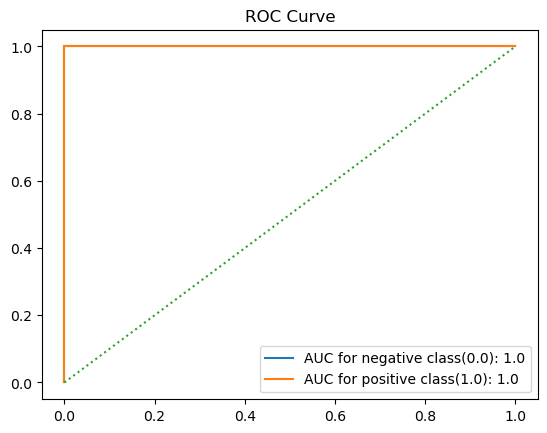

In [24]:
#negative class
FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_pred_probability[::,0], pos_label=0.0)
auc_0 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for negative class(0.0): ' + str(auc_0))

#positive class
FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_pred_probability[::,1], pos_label=1.0)
auc_1 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for positive class(1.0): ' + str(auc_1))

plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.legend()
plt.title("ROC Curve")
plt.show()

# 2a) v)

In [43]:
l_val = 1
df_lx = get_lx_df(test, l_val)

#add labels
for indx, row in df_lx.iterrows():
    if 'bending1' in indx or 'bending2' in indx:
        df_lx.at[indx, 'label'] = 1
    else:
        df_lx.at[indx, 'label'] = 0

X_test = df_lx[selected_features]
Y_test = df_lx['label'].to_numpy()

X_test

Q3_1  Min_3  Min_5  Max_5  Mean_5   Q1_5
bending1/dataset1.csv  42.00   4.00  27.25  38.25   34.31  33.00
bending1/dataset2.csv  43.67   2.00  27.67  38.50   33.02  32.00
bending2/dataset1.csv  26.50   0.00  10.67  30.00   23.49  20.50
bending2/dataset2.csv  30.00   7.50   0.00  33.00   17.62  15.00
lying/dataset1.csv     29.00   0.00   0.00  21.00    8.34   5.50
lying/dataset2.csv     48.00   1.00   0.00  12.75    4.38   2.00
lying/dataset3.csv     48.00   0.00   0.00  12.00    7.62   4.67
sitting/dataset1.csv   43.50   3.00   1.00  28.00   13.38  10.19
sitting/dataset2.csv   46.50   0.00   2.00  24.00   18.44  16.50
sitting/dataset3.csv   45.33   2.00   4.75  26.75   19.33  17.63
standing/dataset1.csv  46.50   0.00   0.00  23.00   13.44   9.33
standing/dataset2.csv  44.50   1.00   2.00  21.25   14.29  12.75
standing/dataset3.csv  45.37   1.50   1.33  21.33   15.55  13.00
walking/dataset1.csv   37.75   5.50   6.75  26.00   16.62  14.75
walking/dataset2.csv   36.75   5.75   7.25  25.00   16.54  14.63
walking/dataset3.csv   38.25   5.00   7.00  24.50   16.25  14.25
cycling/dataset1.csv   40.25   5.50   7.00  25.50   19.61  17.95
cycling/dataset2.csv   40.25   6.50  10.50  24.33   19.52  18.00
cycling/dataset3.csv   40.06   6.33   7.50  24.25   18.13  16.00

In [44]:
Y_pred_test = lr_model.predict(X_test.to_numpy())
Y_pred_test_probability = lr_model.predict_proba(X_test.to_numpy())

print("TEST CONFUSION MATRIX")
confusion_matrix(Y_test, Y_pred_test)

TEST CONFUSION MATRIX


array([[15,  0],
       [ 0,  4]])

In [45]:
#CV Accuracy
count = 0
for i in range(len(Y_test)):
    if Y_test[i] == Y_pred_test[i]:
        count += 1
        
test_acc = round(count/len(Y_test), 4)
print("Test accuracy = " + str(test_acc))

Test accuracy = 1.0


Cross Validation accuracy is the same as test accuracy 

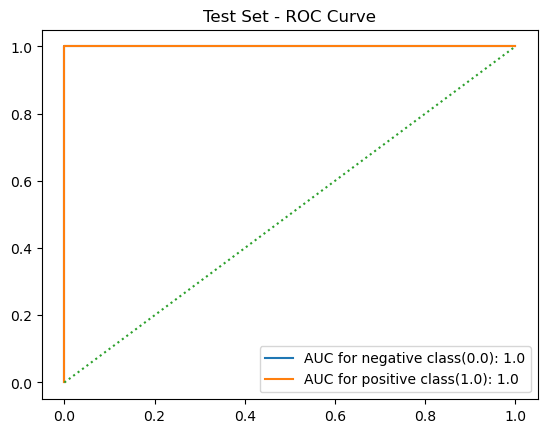

In [27]:
FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_pred_test_probability[::,0], pos_label=0.0)
test_auc_0 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for negative class(0.0): ' + str(test_auc_0))

#positive class
FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_pred_test_probability[::,1], pos_label=1.0)
test_auc_1 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for positive class(1.0): ' + str(test_auc_1))

plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.legend()
plt.title("Test Set - ROC Curve")
plt.show()

# 4) a vi)

The parameters and p-values reported suggest that there is perfect prediction or complete separation among classes.
This means that the maximum likelihood estimator does not exist. 

It is possible that due to perfect prediction there may be instability caused in calculating logistic regression parameters.

# 4) a) vii)

Yes there are imblaanced classes, bending has only 9 rows and non-bending has 60 rows

In [60]:
def create_case_controlled_data(data_set, l_val):
    
    data_set_df = get_lx_df(data_set, l_val)

    for indx, row in data_set_df.iterrows():
        if 'bending1' in indx or 'bending2' in indx:
            data_set_df.at[indx, 'label'] = 1
        else:
            data_set_df.at[indx, 'label'] = 0
        
    bending_df = data_set_df.loc[data_set_df['label'] == 1.0]
    non_bending_df = data_set_df.loc[data_set_df['label'] == 0.0]

    bending_df = resample(bending_df, replace=True, n_samples=60, random_state=60)

    case_controlled_df = pd.concat([bending_df, non_bending_df])
    
    return case_controlled_df


In [87]:
for l_val in range(1, 21):
    
    case_controlled_train_df = create_case_controlled_data(train, l_val)

    X_train = case_controlled_train_df.iloc[:, :-1]
    Y_train = case_controlled_train_df.iloc[:, -1]

    validator = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_model = LogisticRegression(max_iter=400)
    sel = RFECV(estimator=lr_model, scoring='accuracy', cv=validator)
    sel.fit(X_train, Y_train)


    p = sel.n_features_
    acc = round(sel.cv_results_['mean_test_score'].max(), 4)
    
    print( "(l,p): (" +  str(l_val) + ", " + str(p) + "). Accuracy = " + str(acc))

(l,p): (1, 3). Accuracy = 1.0
(l,p): (2, 5). Accuracy = 1.0
(l,p): (3, 6). Accuracy = 0.9917
(l,p): (4, 7). Accuracy = 0.9917
(l,p): (5, 6). Accuracy = 0.9917
(l,p): (6, 22). Accuracy = 1.0
(l,p): (7, 12). Accuracy = 1.0
(l,p): (8, 5). Accuracy = 1.0
(l,p): (9, 3). Accuracy = 1.0
(l,p): (10, 5). Accuracy = 1.0
(l,p): (11, 6). Accuracy = 1.0
(l,p): (12, 6). Accuracy = 1.0
(l,p): (13, 6). Accuracy = 1.0
(l,p): (14, 5). Accuracy = 1.0
(l,p): (15, 7). Accuracy = 1.0
(l,p): (16, 5). Accuracy = 1.0
(l,p): (17, 3). Accuracy = 1.0
(l,p): (18, 3). Accuracy = 1.0
(l,p): (19, 5). Accuracy = 1.0
(l,p): (20, 5). Accuracy = 1.0


In [88]:
l_val = 1
selected_features = []

case_controlled_train_df = create_case_controlled_data(train, l_val)

X_train = case_controlled_train_df.iloc[:, :-1]
Y_train = case_controlled_train_df.iloc[:, -1]

validator = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
lr_model = LogisticRegression(max_iter=400)
sel = RFECV(estimator=lr_model, scoring='accuracy', cv=validator)
sel.fit(X_train, Y_train)


for i in range(len(case_controlled_train_df.columns)-1):
    if sel.support_[i]:
        selected_features.append(case_controlled_train_df.columns[i])
        
        
print("Selected Features for case controlled sample")
selected_features



Selected Features for case controlled sample


['Q1_3', 'Min_5', 'Max_5']

In [89]:
X_train = case_controlled_train_df[selected_features].to_numpy()
Y_train = case_controlled_train_df['label'].to_numpy()

lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_train)
Y_pred_probability = lr_model.predict_proba(X_train)

print("CASE CONTROLLED CONFUSION MATRIX")
confusion_matrix(Y_train, Y_pred)

CASE CONTROLLED CONFUSION MATRIX


array([[60,  0],
       [ 0, 60]])

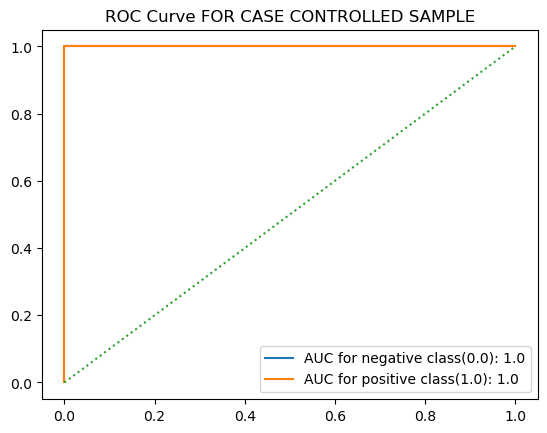

In [90]:
#negative class
FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_pred_probability[::,0], pos_label=0.0)
auc_0 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for negative class(0.0): ' + str(auc_0))

#positive class
FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_pred_probability[::,1], pos_label=1.0)
auc_1 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for positive class(1.0): ' + str(auc_1))

plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.legend()
plt.title("ROC Curve FOR CASE CONTROLLED SAMPLE")
plt.show()

In [94]:
l_val = 1
df_lx = get_lx_df(test, l_val)

#add labels
for indx, row in df_lx.iterrows():
    if 'bending1' in indx or 'bending2' in indx:
        df_lx.at[indx, 'label'] = 1
    else:
        df_lx.at[indx, 'label'] = 0

X_test = df_lx[selected_features]
Y_test = df_lx['label'].to_numpy()

X_test

Q1_3  Min_5  Max_5
bending1/dataset1.csv  16.00  27.25  38.25
bending1/dataset2.csv  19.00  27.67  38.50
bending2/dataset1.csv  18.00  10.67  30.00
bending2/dataset2.csv  18.00   0.00  33.00
lying/dataset1.csv      3.50   0.00  21.00
lying/dataset2.csv      5.67   0.00  12.75
lying/dataset3.csv      3.00   0.00  12.00
sitting/dataset1.csv   15.00   1.00  28.00
sitting/dataset2.csv   15.00   2.00  24.00
sitting/dataset3.csv   10.00   4.75  26.75
standing/dataset1.csv   9.75   0.00  23.00
standing/dataset2.csv  11.25   2.00  21.25
standing/dataset3.csv  14.00   1.33  21.33
walking/dataset1.csv   14.00   6.75  26.00
walking/dataset2.csv   13.63   7.25  25.00
walking/dataset3.csv   13.25   7.00  24.50
cycling/dataset1.csv   14.25   7.00  25.50
cycling/dataset2.csv   14.00  10.50  24.33
cycling/dataset3.csv   13.75   7.50  24.25

In [95]:
Y_pred_test = lr_model.predict(X_test.to_numpy())
Y_pred_test_probability = lr_model.predict_proba(X_test.to_numpy())

print("TEST CONFUSION MATRIX FOR CASE CONTROLLED SAMPLE")
confusion_matrix(Y_test, Y_pred_test)

TEST CONFUSION MATRIX FOR CASE CONTROLLED SAMPLE


array([[15,  0],
       [ 1,  3]])

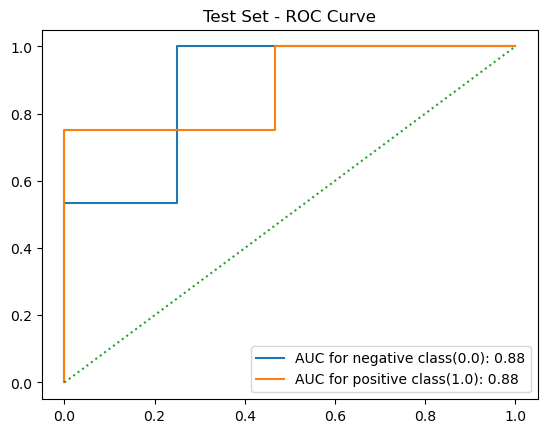

In [96]:
FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_pred_test_probability[::,0], pos_label=0.0)
test_auc_0 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for negative class(0.0): ' + str(test_auc_0))

#positive class
FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_pred_test_probability[::,1], pos_label=1.0)
test_auc_1 = round(auc(FPR, TPR), 2)
plt.plot(FPR, TPR, label='AUC for positive class(1.0): ' + str(test_auc_1))

plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.legend()
plt.title("Test Set - ROC Curve")
plt.show()

# 2b) i)

In [28]:
optL = -1
maxAccuracy = -1

for l_val in range(1, 21):

    #l_val = 9
    train_df_lx = get_lx_df(train, l_val)
    test_df_lx = get_lx_df(test, l_val)

    for indx, row in train_df_lx.iterrows():
        if 'bending1' in indx or 'bending2' in indx:
            train_df_lx.at[indx, 'label'] = 1
        else:
            train_df_lx.at[indx, 'label'] = 0

    for indx, row in test_df_lx.iterrows():
        if 'bending1' in indx or 'bending2' in indx:
            test_df_lx.at[indx, 'label'] = 1
        else:
            test_df_lx.at[indx, 'label'] = 0

    X_train = train_df_lx.iloc[:, :-1]
    Y_train = train_df_lx.iloc[:, -1]
    X_test = test_df_lx.iloc[:, :-1]
    Y_test = test_df_lx.iloc[:, -1]

    model = LogisticRegressionCV(cv=5, max_iter=500, penalty='l1', solver='liblinear', scoring='accuracy', random_state=69)
    model.fit(X_train, Y_train)

    train_acc = round(model.score(X_train, Y_train), 4)
    test_acc = round(model.score(X_test, Y_test), 4)
    
    print('L value: ' + str(l_val) + ', Test Accuracy: ' + str(test_acc))
    
    if test_acc > maxAccuracy:
        maxAccuracy = test_acc
        optL = l_val
        
print()
print('Optimal L-value: ' + str(optL) + ', cooresponding test accuracy: ' + str(maxAccuracy))

L value: 1, Test Accuracy: 1.0
L value: 2, Test Accuracy: 1.0
L value: 3, Test Accuracy: 1.0
L value: 4, Test Accuracy: 0.9474
L value: 5, Test Accuracy: 0.9474
L value: 6, Test Accuracy: 0.9474
L value: 7, Test Accuracy: 1.0
L value: 8, Test Accuracy: 0.9474
L value: 9, Test Accuracy: 0.9474
L value: 10, Test Accuracy: 0.9474
L value: 11, Test Accuracy: 1.0
L value: 12, Test Accuracy: 0.9474
L value: 13, Test Accuracy: 1.0
L value: 14, Test Accuracy: 1.0
L value: 15, Test Accuracy: 1.0
L value: 16, Test Accuracy: 1.0
L value: 17, Test Accuracy: 0.9474
L value: 18, Test Accuracy: 1.0
L value: 19, Test Accuracy: 0.9474
L value: 20, Test Accuracy: 0.9474

Optimal L-value: 1, cooresponding test accuracy: 1.0


# 2b) ii)

Test accuracy is same for L1-penalized and variable selection using p-values. 
L1-penalized is easier to implement because feature selection step is taken care.

# 2c) i)


In [29]:
optL = -1
maxAccuracy = -1

for l_val in range(1, 21):

    train_df_lx = get_lx_df(train, l_val)
    test_df_lx = get_lx_df(test, l_val)

    for indx, row in train_df_lx.iterrows():
        train_df_lx.at[indx, 'label'] = indx.split("/")[0]

    for indx, row in test_df_lx.iterrows():
        test_df_lx.at[indx, 'label'] = indx.split("/")[0]

    X_train = train_df_lx.iloc[:, :-1]
    Y_train = train_df_lx.iloc[:, -1]
    X_test = test_df_lx.iloc[:, :-1]
    Y_test = test_df_lx.iloc[:, -1]

    model = LogisticRegressionCV(cv=5, solver='saga', max_iter=100, multi_class= 'multinomial', penalty='l1', scoring='accuracy', random_state=69)
    model.fit(X_train, Y_train)

    train_acc = round(model.score(X_train, Y_train), 4)
    test_acc = round(model.score(X_test, Y_test), 4)
    
    print('L value: ' + str(l_val) + ', Test Accuracy: ' + str(test_acc))
    
    if test_acc > maxAccuracy:
        maxAccuracy = test_acc
        optL = l_val
        
print()
print('Optimal L-value: ' + str(optL) + ', cooresponding test accuracy: ' + str(maxAccuracy))

L value: 1, Test Accuracy: 0.8947
L value: 2, Test Accuracy: 0.9474
L value: 3, Test Accuracy: 0.8421
L value: 4, Test Accuracy: 0.8947
L value: 5, Test Accuracy: 0.8421
L value: 6, Test Accuracy: 0.7895
L value: 7, Test Accuracy: 0.7895
L value: 8, Test Accuracy: 0.8421
L value: 9, Test Accuracy: 0.7895
L value: 10, Test Accuracy: 0.8421
L value: 11, Test Accuracy: 0.8421
L value: 12, Test Accuracy: 0.8421
L value: 13, Test Accuracy: 0.8421
L value: 14, Test Accuracy: 0.8421
L value: 15, Test Accuracy: 0.8421
L value: 16, Test Accuracy: 0.8421
L value: 17, Test Accuracy: 0.8421
L value: 18, Test Accuracy: 0.8421
L value: 19, Test Accuracy: 0.7895
L value: 20, Test Accuracy: 0.8421

Optimal L-value: 2, cooresponding test accuracy: 0.9474


In [30]:
l_val = 2

train_df_lx = get_lx_df(train, l_val)
test_df_lx = get_lx_df(test, l_val)

for indx, row in train_df_lx.iterrows():
    train_df_lx.at[indx, 'label'] = indx.split("/")[0]

for indx, row in test_df_lx.iterrows():
    test_df_lx.at[indx, 'label'] = indx.split("/")[0]

X_train = train_df_lx.iloc[:, :-1]
Y_train = train_df_lx.iloc[:, -1]
X_test = test_df_lx.iloc[:, :-1]
Y_test = test_df_lx.iloc[:, -1]

model = LogisticRegressionCV(solver='saga', max_iter=100, multi_class= 'multinomial', penalty='l1', scoring='accuracy', random_state=69)
model.fit(X_train, Y_train)


LogisticRegressionCV(multi_class='multinomial', penalty='l1', random_state=69,
                     scoring='accuracy', solver='saga')

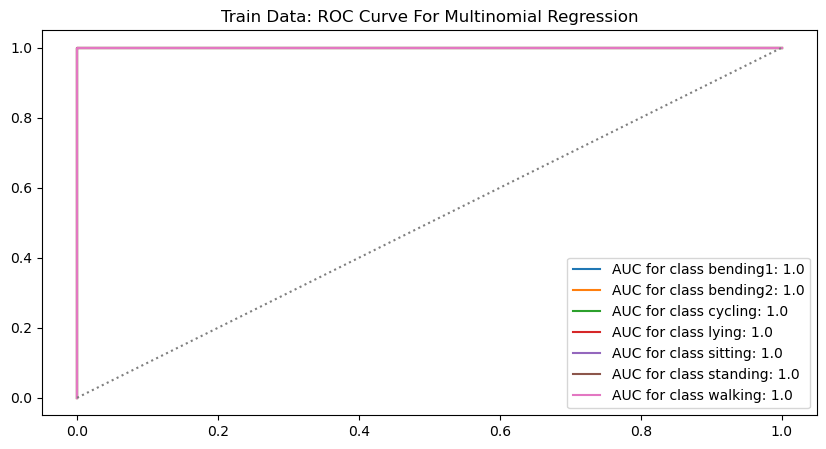

In [31]:
Y_train_pred = model.predict(X_train.to_numpy())
Y_train_pred_probability = model.predict_proba(X_train.to_numpy())

confusion_matrix(Y_train, Y_train_pred)

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Train Data: ROC Curve For Multinomial Regression")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_train_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


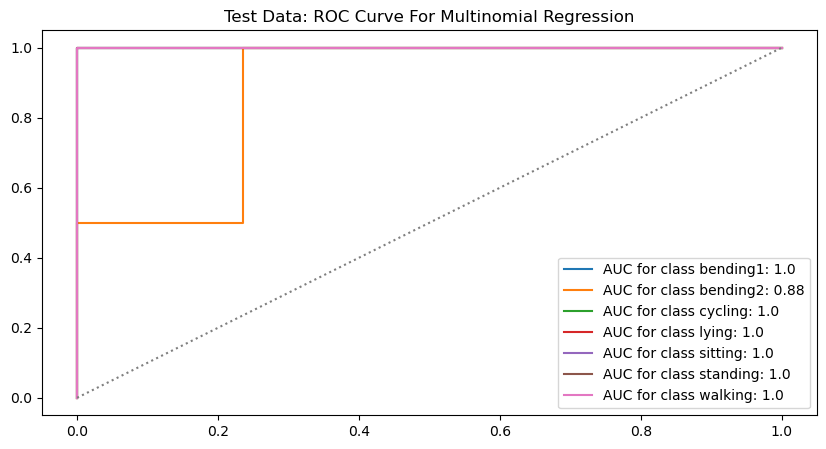

In [32]:
Y_test_pred = model.predict(X_test.to_numpy())
Y_test_pred_probability = model.predict_proba(X_test.to_numpy())

print(confusion_matrix(Y_test, Y_test_pred))

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test Data: ROC Curve For Multinomial Regression")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_test_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

# 2c) ii)

In [33]:
print("Gaussian Naive Bayes")
optL = -1
maxAccuracy = -1

for l_val in range(1, 21):

    train_df_lx = get_lx_df(train, l_val)
    test_df_lx = get_lx_df(test, l_val)

    for indx, row in train_df_lx.iterrows():
        train_df_lx.at[indx, 'label'] = indx.split("/")[0]

    for indx, row in test_df_lx.iterrows():
        test_df_lx.at[indx, 'label'] = indx.split("/")[0]

    X_train = train_df_lx.iloc[:, :-1]
    Y_train = train_df_lx.iloc[:, -1]
    X_test = test_df_lx.iloc[:, :-1]
    Y_test = test_df_lx.iloc[:, -1]

    model = GaussianNB()
    model.fit(X_train, Y_train)

    train_acc = round(model.score(X_train, Y_train), 4)
    test_acc = round(model.score(X_test, Y_test), 4)
    
    print('L value: ' + str(l_val) + ', Test Accuracy: ' + str(test_acc))
    
    if test_acc > maxAccuracy:
        maxAccuracy = test_acc
        optL = l_val
        
print()
print('Optimal L-value: ' + str(optL) + ', cooresponding test accuracy: ' + str(maxAccuracy))

Gaussian Naive Bayes
L value: 1, Test Accuracy: 0.8947
L value: 2, Test Accuracy: 0.6316
L value: 3, Test Accuracy: 0.7368
L value: 4, Test Accuracy: 0.7895
L value: 5, Test Accuracy: 0.7368
L value: 6, Test Accuracy: 0.6842
L value: 7, Test Accuracy: 0.6842
L value: 8, Test Accuracy: 0.7368
L value: 9, Test Accuracy: 0.7895
L value: 10, Test Accuracy: 0.6842
L value: 11, Test Accuracy: 0.5789
L value: 12, Test Accuracy: 0.6842
L value: 13, Test Accuracy: 0.6842
L value: 14, Test Accuracy: 0.5789
L value: 15, Test Accuracy: 0.5789
L value: 16, Test Accuracy: 0.5789
L value: 17, Test Accuracy: 0.5263
L value: 18, Test Accuracy: 0.6316
L value: 19, Test Accuracy: 0.6316
L value: 20, Test Accuracy: 0.4737

Optimal L-value: 1, cooresponding test accuracy: 0.8947


In [34]:
l_val = 1

train_df_lx = get_lx_df(train, l_val)
test_df_lx = get_lx_df(test, l_val)

for indx, row in train_df_lx.iterrows():
    train_df_lx.at[indx, 'label'] = indx.split("/")[0]

for indx, row in test_df_lx.iterrows():
    test_df_lx.at[indx, 'label'] = indx.split("/")[0]

X_train = train_df_lx.iloc[:, :-1]
Y_train = train_df_lx.iloc[:, -1]
X_test = test_df_lx.iloc[:, :-1]
Y_test = test_df_lx.iloc[:, -1]

model = GaussianNB()
model.fit(X_train, Y_train)


GaussianNB()

[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


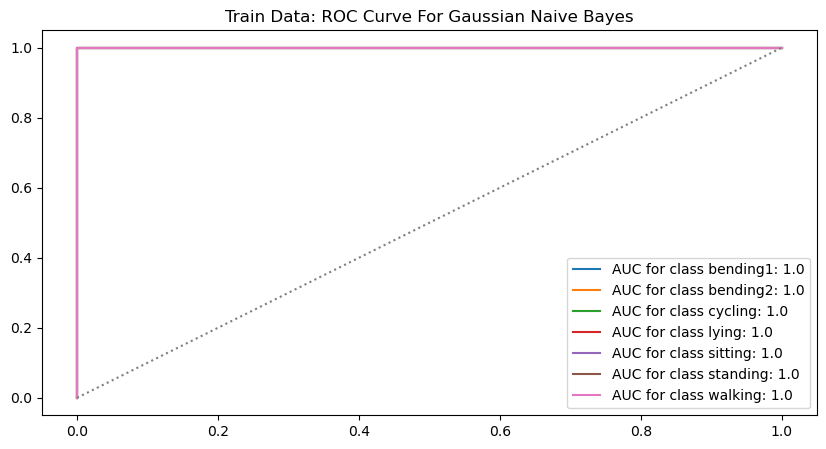

In [35]:
Y_train_pred = model.predict(X_train.to_numpy())
Y_train_pred_probability = model.predict_proba(X_train.to_numpy())

print(confusion_matrix(Y_train, Y_train_pred))

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Train Data: ROC Curve For Gaussian Naive Bayes")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_train_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


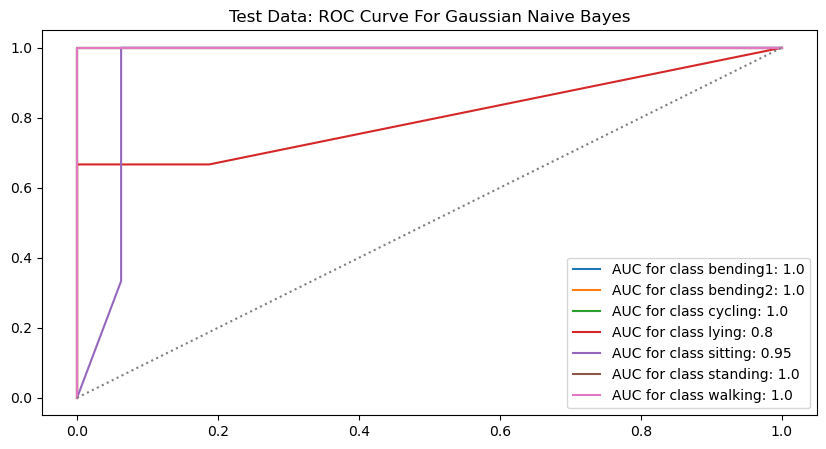

In [36]:
Y_test_pred = model.predict(X_test.to_numpy())
Y_test_pred_probability = model.predict_proba(X_test.to_numpy())

print(confusion_matrix(Y_test, Y_test_pred))

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test Data: ROC Curve For Gaussian Naive Bayes")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_test_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

Multinomial Naive Bayes

In [37]:
print("Multinomial Naive Bayes")
optL = -1
maxAccuracy = -1

for l_val in range(1, 21):

    train_df_lx = get_lx_df(train, l_val)
    test_df_lx = get_lx_df(test, l_val)

    for indx, row in train_df_lx.iterrows():
        train_df_lx.at[indx, 'label'] = indx.split("/")[0]

    for indx, row in test_df_lx.iterrows():
        test_df_lx.at[indx, 'label'] = indx.split("/")[0]

    X_train = train_df_lx.iloc[:, :-1]
    Y_train = train_df_lx.iloc[:, -1]
    X_test = test_df_lx.iloc[:, :-1]
    Y_test = test_df_lx.iloc[:, -1]

    model = MultinomialNB()
    model.fit(X_train, Y_train)

    train_acc = round(model.score(X_train, Y_train), 4)
    test_acc = round(model.score(X_test, Y_test), 4)
    
    print('L value: ' + str(l_val) + ', Test Accuracy: ' + str(test_acc))
    
    if test_acc > maxAccuracy:
        maxAccuracy = test_acc
        optL = l_val
        
print()
print('Optimal L-value: ' + str(optL) + ', cooresponding test accuracy: ' + str(maxAccuracy))

Multinomial Naive Bayes
L value: 1, Test Accuracy: 0.8947
L value: 2, Test Accuracy: 0.7368
L value: 3, Test Accuracy: 0.7895
L value: 4, Test Accuracy: 0.7895
L value: 5, Test Accuracy: 0.7368
L value: 6, Test Accuracy: 0.7368
L value: 7, Test Accuracy: 0.7368
L value: 8, Test Accuracy: 0.7368
L value: 9, Test Accuracy: 0.7368
L value: 10, Test Accuracy: 0.7368
L value: 11, Test Accuracy: 0.8421
L value: 12, Test Accuracy: 0.7895
L value: 13, Test Accuracy: 0.7895
L value: 14, Test Accuracy: 0.7368
L value: 15, Test Accuracy: 0.7895
L value: 16, Test Accuracy: 0.8421
L value: 17, Test Accuracy: 0.8421
L value: 18, Test Accuracy: 0.7895
L value: 19, Test Accuracy: 0.8421
L value: 20, Test Accuracy: 0.8421

Optimal L-value: 1, cooresponding test accuracy: 0.8947


In [38]:
l_val = 1

train_df_lx = get_lx_df(train, l_val)
test_df_lx = get_lx_df(test, l_val)

for indx, row in train_df_lx.iterrows():
    train_df_lx.at[indx, 'label'] = indx.split("/")[0]

for indx, row in test_df_lx.iterrows():
    test_df_lx.at[indx, 'label'] = indx.split("/")[0]

X_train = train_df_lx.iloc[:, :-1]
Y_train = train_df_lx.iloc[:, -1]
X_test = test_df_lx.iloc[:, :-1]
Y_test = test_df_lx.iloc[:, -1]

model = MultinomialNB()
model.fit(X_train, Y_train)


MultinomialNB()

[[ 5  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  1  0  1 10  0  0]
 [ 0  0  0  0  2 10  0]
 [ 0  0  0  0  0  0 12]]


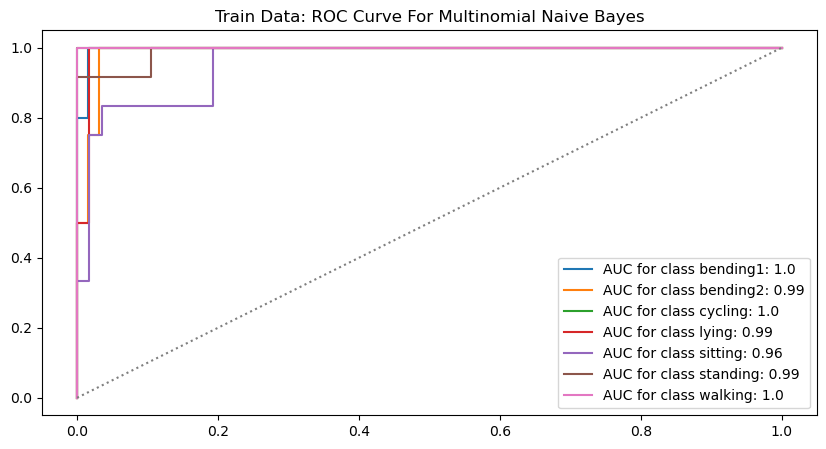

In [39]:
Y_train_pred = model.predict(X_train.to_numpy())
Y_train_pred_probability = model.predict_proba(X_train.to_numpy())

print(confusion_matrix(Y_train, Y_train_pred))

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Train Data: ROC Curve For Multinomial Naive Bayes")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_train,  Y_train_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


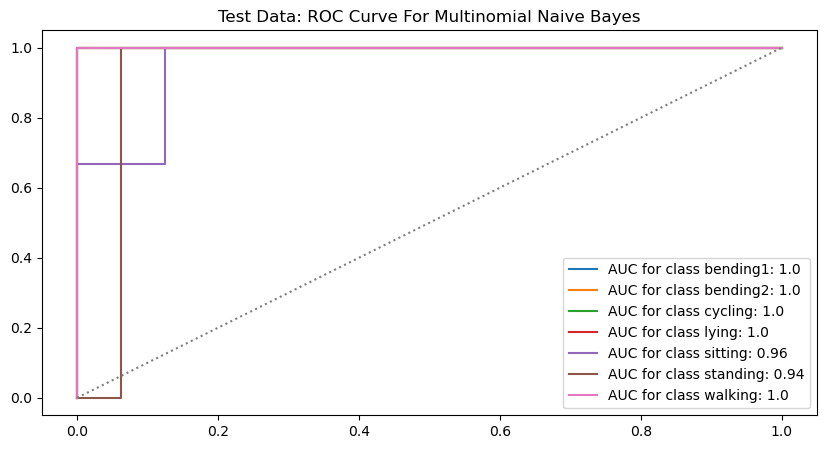

In [40]:
Y_test_pred = model.predict(X_test.to_numpy())
Y_test_pred_probability = model.predict_proba(X_test.to_numpy())

print(confusion_matrix(Y_test, Y_test_pred))

classes = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test Data: ROC Curve For Multinomial Naive Bayes")

for i in range(len(classes)):
    FPR, TPR, thresholds = metrics.roc_curve(Y_test,  Y_test_pred_probability[::,i], pos_label=classes[i])
    auc_val = round(auc(FPR, TPR), 2)
    axes.plot(FPR, TPR, label='AUC for class ' + str(classes[i]) + ': ' + str(auc_val))

axes.plot([0, 1], [0, 1], linestyle='dotted')
axes.legend()
plt.show()

In terms of test accuracy, both Gaussian and Multinomial Naive Bayes models look similar. But, when looking at the ROC and AUC for train data, the Gaussian model seems to perform a little better on train data and l-value = 1 as compared to Multinomial model 

# 2c) iii)

Out of the 3 models, logistic regression performed the best when considering test accuracy. So, logistic regression will be better suited for classification on this dataset.